# Gene-Expression Differences in Peripheral Blood Between Lithium Responders and non-Responders in the Lithium Treatment-Moderate Dose Use Study

# Secção 1 - Exploração do Dataset Pela Análise de Dados e Metadados 

## Breve Descrição do Estudo e do Dataset

A Perturbação bipolar é uma patologia psiquiátrica crónica que se caracteriza por variações acentuadas do humor. Tipicamente, manifesta-se por episódios de elevação do humor, aumento da energia e da atividade e euforia, conhecidos como episódios maníacos ou hipomaníacos intercalados com fases de depressão e diminuição da energia e da atividade, conhecidos como episódios depressivos.
Estes episódios podem ser graves, moderados ou leves e tem um grande impacto no quotidiano da pessoa afetada, uma vez que afeta sensações, emoções, ideias e comportamentos da mesma, o que se traduz numa perda significativa de qualidade de vida e de autonomia. 
Segundo dados da Organização Mundial da Saúde (OMS), a doença bipolar atinge atualmente cerca de 140 milhões de pessoas no mundo, já na realidade portuguesa, estima-se que existam 200 mil casos afetando cerca de 2% da população.

O tratamento comum para desta patologia inclui terapia psicológica e o uso de medicamentos. Destes últimos destacam-se os medicamentos que contém lítio que atenua as mudanças de humor bipolares, mas não tem efeito no humor normal, sendo eficaz na prevenção de episódios maníacos e depressivos em pessoas com essa condição.

### Estudo 

Neste estudo pretende-se aferir a influência do lítio no controlo e tratamento dos sintomas associados a esta perturbação. Para isto foi feito o ensaio com 60 utentes, estes foram divididos em grupo de controlo e em grupo tratado com lítio. A todos os pacientes foram retiradas 2 amostras de sangue periférico uma antes do tratamento com lítio e outra após 1 mês. A resposta ao tratamento foi analisada 6 meses depois através da expressão genética obtida através das análises ao sangue. Os resultados identificam uma assinatura de expressão genética para a resposta ao tratamento com lítio em pacientes com perturbação bipolar.

### Dados Fornecidos 

Do estudo realizado resultaram dois ficheiros, o primeiro, referente aos dados (gds5393.csv) contém a expressão genética presente no sangue de cada amostra obtida, o segundo, referente aos metadados (meta-gds5393.csv), contém 120 amostras referentes às análises de sangue periférico de pacientes com transtorno bipolar.

Ao analisar o conjunto de dados, observamos que os metadados incluem informações essenciais, as variáveis, expostas em colunas: 

- sample: (GSMXXXXXXX) Identificador da amostra. Existem 120, referentes a duas amostras de colheita de sangue por paciente.
- agent: (control ou lithium) - Indica se a amostra é de um indivíduo de controlo ou de um submetido ao tratamento com lítio.
- other: (responder ou non-responder) - Identifica se a amostra é de um indivíduo onde se verificou resposta ou não ao tratamento.
- time: (baseline ou 1 month) - Indica quando é que a amostra foi recolhida.
- individual: Identificador único do indivíduo, que pode ser OPT_(N) para indivíduos de control e Li+OPT_(N) para indivíduos que receberam lítio. 
              Cada um tem duas amostras (baseline e 1 month).
- description: Descrição adicional sobre cada amostra.


#### Importar bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier

## Carregar dados e metadados do dataset:

In [2]:
data = pd.read_csv('Dataset5/gds5393.csv', index_col=0)
meta = pd.read_csv('Dataset5/meta-gds5393.csv', index_col = 0)

## Exploração de Dados

Começamos por ver o inicio do dataset referente aos Dados  

In [192]:
data.head()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o passo de cima só vemos 5 linhas do dataset para ver quantas linhas são fazemos o seguinte:

In [193]:
data.values.shape

(48107, 120)

Para uma melhor compreensão do dataset utilizamos o describe. Esta operação é útil para ter uma visão rápida e resumida do conjunto de dados, ajuda ainda a ver as características principais sem ter que examinar todas as informações detalhadamente. 
Esta foi feita de duas formas, por genes e por amostras

In [194]:
data.describe()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,...,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577
std,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,...,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915
min,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,...,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480
25%,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735,6.815735,6.815730,6.815730,...,6.815735,6.815735,6.815735,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735
50%,6.940240,6.940240,6.940240,6.940240,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,...,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240
75%,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,...,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960
max,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,...,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700


Daqui vemos que existem vários dados nulos e que terão de ser tratados. Existem 48107 colunas de genes mas o count da tabela de baixo indica que existem apenas 47323

De seguida avaliamos o tipo de dados presentes no data set

In [195]:
data.dtypes

GSM1105438    float64
GSM1105486    float64
GSM1105487    float64
GSM1105490    float64
GSM1105491    float64
               ...   
GSM1105525    float64
GSM1105552    float64
GSM1105452    float64
GSM1105453    float64
GSM1105456    float64
Length: 120, dtype: object

 Os dados referentes as amostras são do tipo float64 isso indica que os dados são do tipo de dado "float" (ponto flutuante) com uma precisão de 64 bits.

## Exploração de Metadados

Da mesma forma que a exploração foi feita para os dados também é importante realizar esta analise no dataset referente aos metadados

In [196]:
meta.head()

,sample,agent,other,time,individual,description
GSM1105438,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
GSM1105486,GSM1105486,control,non-responder,baseline,OPT_11,Value for GSM1105486: OPT_11-baseline; src: Pe...
GSM1105487,GSM1105487,control,non-responder,baseline,OPT_12,Value for GSM1105487: OPT_12-baseline; src: Pe...
GSM1105490,GSM1105490,control,non-responder,baseline,OPT_13,Value for GSM1105490: OPT_13-baseline; src: Pe...
GSM1105491,GSM1105491,control,non-responder,baseline,OPT_14,Value for GSM1105491: OPT_14-baseline; src: Pe...


In [197]:
meta.values.shape

(120, 6)

120 linhas (amostras) e 6 colunas (variáveis)

In [198]:
meta.describe()

,sample,agent,other,time,individual,description
count,120,120,120,120,120,120
unique,120,2,2,2,60,120
top,GSM1105502,control,non-responder,baseline,OPT_1,Value for GSM1105502: Li+OPT_16-baseline; src:...
freq,1,64,94,60,2,1


Analisando esta tabela confirmamos que contém 120 amostras distintas ("sample")

A variável "agent" é representado por 2 valores distintos, o mais comum, com 64 amostras é o "control" 

Na variável responsavel por indicar se o individuo respondeu ou não ao tratamento, "other", também contém dois valores distintos. O mais comum é "non-responder" presente emc 94 amostras.

A variável correspondente ao tempo contém também dois valores, O valor "baseline" é o mais comum, ou seja a amostra retirada logo no inicio do tratamento 

No identificador unico de cada paciente, "individual", temos 60 valores, com uma frequência de 2, o que nos diz que cada paciente contem 2 amostras no conjunto de dados.

A variável que nos indica comentários adicionados à amostra, "description", tem 120 valores.

In [199]:
meta.dtypes

sample         object
agent          object
other          object
time           object
individual     object
description    object
dtype: object

Os metadados são do tipo "object" o que nos indica que as colunas contêm informações de texto ou uma combinação de diferentes tipos de dados.

### Representação Gráfica de Metadados

Representação de proporção de pacientes classificados como 'responders' e 'non-responders':

In [200]:
meta.groupby("other").size()

other
non-responder    94
responder        26
dtype: int64

<Axes: >

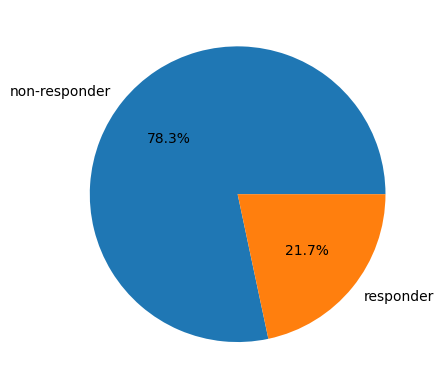

In [201]:
meta.groupby("other").size().plot.pie(autopct='%1.1f%%')

Representação de proporção de pacientes que receberam tratamento de controlo e tratamento com lítio:

<Axes: >

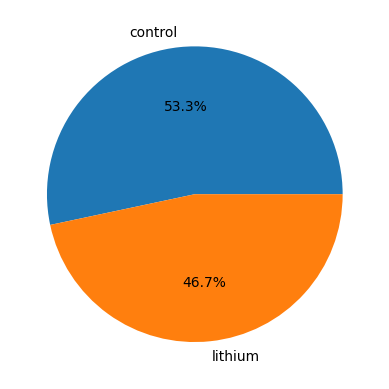

In [202]:
meta.groupby("agent").size().plot.pie(autopct='%1.1f%%')

### Relação entre Tratamento e Reposta


Para relacionar variáveis presentes nos metadados vamos agrupar por 'agent' e contar o numero das respostas permitidas no 'other'em cada grupo, controlo e com litio

In [203]:
# Agrupar por 'agent' e contar o número de respondeu e não respondeu em cada grupo
group_by_agent = meta.groupby(['agent', 'other']).size().unstack(fill_value=0)
group_by_agent

other,non-responder,responder
agent,,
control,56,8
lithium,38,18


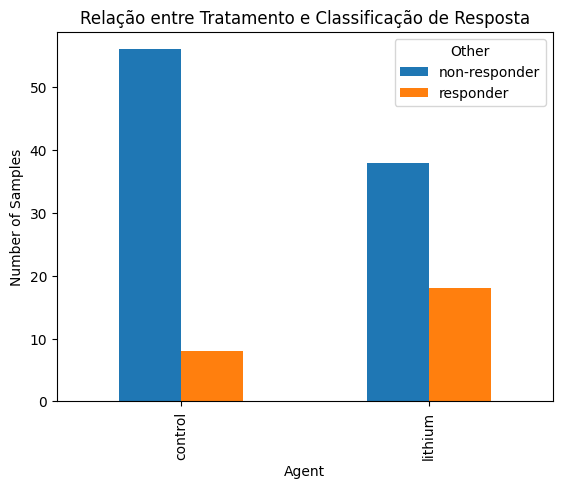

In [204]:
# Visualização gráfica

group_by_agent.plot.bar()

plt.title('Relação entre Tratamento e Classificação de Resposta')
plt.xlabel('Agent')
plt.ylabel('Number of Samples')
plt.legend(title='Other', loc='upper right')

Com isto, entende-se que o nosso dataset é composto por um número de amostras de pacientes a receber tratamento de conttrolo superior ao de pacientes a receber tratamento com lítio, e, ainda, que a proporção de pacientes que exibiram resposta biológica ao tratamento, ou seja, exibiram variação de expressão genética, sendo então classificados como 'responders' é bastante inferior aos que não exibiram resposta ('non-responders'). Pode-se inferir que o tratamento com lítio induziu uma resposta em cerca de metade dos pacientes, mas destaca-se também a existência de alguns pacientes a exibir resposta quando receberam somente o tratamento de controlo.

## Tratamento de Dados 

### Eliminação de Dados Nulos
Como visto na exploração de dados feita existem dados nulos, isto é uma problemática que tem de ser resolvida para que seja possivel continuar o processo desejado

In [205]:
data.isnull().sum().sum()

94080

In [206]:
meta.isnull().sum().sum()

0

Confirma-se a existencia de dados nulos no conjunto de dados referentes aos dados 

In [207]:
data.isnull().sum()

GSM1105438    784
GSM1105486    784
GSM1105487    784
GSM1105490    784
GSM1105491    784
             ... 
GSM1105525    784
GSM1105552    784
GSM1105452    784
GSM1105453    784
GSM1105456    784
Length: 120, dtype: int64

Eliminamos as linhas que continham pelo menos um valor nulo 

In [3]:
data = data.dropna()

In [4]:
data.values.shape

(47323, 120)

Confirma-se que os valores nulos foram eliminados 

### Transposição de Dados

A disposição atual do conjunto de dados posiciona as amostras em colunas e os genes em linhas. Porém como os genes representam as características em análise, eles devem ser posicionados nas colunas. Portanto, o conjunto de dados precisa ser transposto.

In [5]:
data = data.transpose()
data.head()

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1105438,14.8983,12.1027,6.90845,6.97636,6.89734,7.01968,11.9813,7.94897,6.88075,7.05958,...,6.89246,6.78430,6.92158,6.92631,7.12904,6.77274,6.85770,7.08213,6.85267,7.81762
GSM1105486,14.7170,12.4403,6.63058,7.16577,6.84158,6.87300,12.9543,7.86514,6.87122,6.87390,...,6.92284,6.82762,7.09969,6.84452,6.92715,6.78293,6.81344,6.85598,6.74649,7.55871
GSM1105487,14.8411,12.4878,6.74203,7.23598,6.83540,7.13678,12.9664,8.50659,6.92326,6.91722,...,6.85514,6.67967,6.91126,6.79946,7.20899,6.73403,6.69688,6.96195,6.82538,7.69129
GSM1105490,14.9191,11.6591,6.84711,7.20855,6.86877,6.87585,13.4400,7.85840,6.79209,6.96697,...,6.86023,6.86298,7.09422,6.83745,7.18966,6.85946,6.69968,6.99962,6.96305,7.32495
GSM1105491,14.7371,11.9833,6.83116,7.17747,6.84190,6.91533,12.9282,7.71051,6.94781,7.10965,...,6.92191,6.79342,6.89431,6.91218,7.23281,6.87367,6.68000,6.88795,6.87131,7.90085


## Análise de Genes de Maior Relevância

### Testes Estatísticos Univariados 

De maneira a identificar os genes principais, ou seja, os genes que apresentam maior relevência para os dados, utilizam-se métodos de SelectKBest para efetuar avaliaçoes de cada recurso (neste caso, de cada coluna correspondente a um gene) individualmente, com base numa métrica escolhida, selecionando, por fim, os recursos com melhor pontuação.

In [6]:
# Selecionar os 5 melhores genes, com análises ANOVA
skb = SelectKBest(f_classif, k=5)

labels = data.iloc[:,0]
x_kbest = skb.fit_transform(data.iloc[:,1:], labels)

columns_best = data[skb.get_feature_names_out()]
data_kbest = pd.DataFrame(data=x_kbest, index=data.index, columns=columns_best.columns)
print(data_kbest.shape)
data_kbest.head()

(120, 5)


,ILMN_1669208,ILMN_1722603,ILMN_1801428,ILMN_2179018,ILMN_2331501
GSM1105438,6.92317,6.71232,6.77757,9.31056,14.9082
GSM1105486,6.82055,6.81113,6.63592,10.11210,14.9082
GSM1105487,7.15070,6.65014,6.76708,10.39390,14.9522
GSM1105490,6.84683,6.65142,6.66969,10.16470,14.8983
GSM1105491,7.33096,6.76451,6.72857,9.69256,14.9766


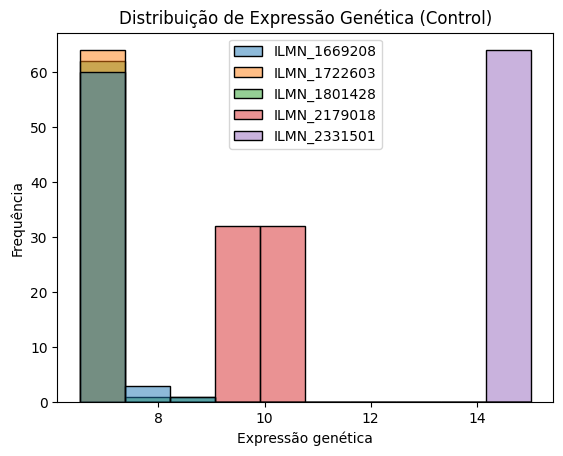

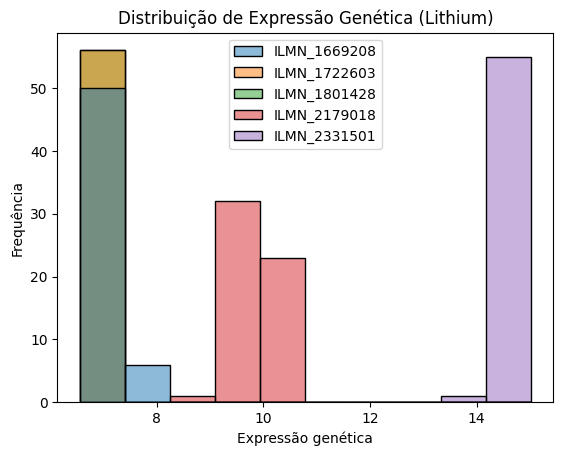

In [7]:
# Visualização gráfica de Distribuição de Expressão Genética para tratamentos diferentes

data_kbest_control = data_kbest.loc[meta.query("agent == 'control'").index,:]

sns.histplot(data_kbest_control)
plt.xlabel('Expressão genética')
plt.ylabel('Frequência')
plt.title('Distribuição de Expressão Genética (Control)')
plt.show()

data_kbest_lithium = data_kbest.loc[meta.query("agent == 'lithium'").index,:]

sns.histplot(data_kbest_lithium)
plt.xlabel('Expressão genética')
plt.ylabel('Frequência')
plt.title('Distribuição de Expressão Genética (Lithium)')
plt.show()

Comparando a distribuição de expressão genética entre tratamentos, atendendo aos 5 anteriormente identificados, podemos avaliar o efeito observado na expressão genética como resultado da administração de tratamento com lítio. Assim sendo, observa-se, após tratamento com lítio, variações significativas na distribuiçõ de expressão genética dos genes ILMN_2331501 (roxo) e ILMN_2179018 (vermelho). A distribuição de expressão genética dos restantes genes analisados apresentam também alguma variação como resultado do tratamento. Com isto, pode-se deduzir que o tratamento com lítio apresenta ter efeito sobre os genes identificados, sendo que a variação de expressão genética induzida pode estar relacionada com a resposta exibida pelos pacientes.

## Escolha de Metadados de Maior Relevância

Tendo como objetivo principal a classificação de individuos como responders ou non-responders, considerou-se mais relevantes os metadados relativos ao tipo de tratamento recebido, o momento de colheita de amostra e, por fim, o resultado da classificação final. Assim, procede-se o trabalho apenas com os seguintes metadados: "agent", "time", "other".

In [9]:
meta = meta[['agent', 'time', 'other']]
meta.head()

,agent,time,other
GSM1105438,control,baseline,non-responder
GSM1105486,control,baseline,non-responder
GSM1105487,control,baseline,non-responder
GSM1105490,control,baseline,non-responder
GSM1105491,control,baseline,non-responder


# Secção 2 - Redução de Dimensionalidade e Clustering de Dados

## Filtração de Dados

### Filtrar Dados por Variância

Procura-se identificar todas as colunas de dados, ou seja, todos os genes que apresentam alta variabilidade, segundo o valor de threshold considerado.

In [10]:
# Filtração por variância para um threshold de 10%
variance = VarianceThreshold(threshold=0.1)
x_variance = variance.fit_transform(data)

variance_columns = data.columns[variance.get_support()]
data_variance = data[variance_columns]
print("Features com maior variância:\n", data_variance.shape)
data_variance.head()

Features com maior variância:
 (120, 4389)


,ILMN_1651228,ILMN_1651347,ILMN_1651373,ILMN_1651385,ILMN_1651429,ILMN_1651433,ILMN_1651438,ILMN_1651496,ILMN_1651499,ILMN_1651705,...,ILMN_3307827,ILMN_3307868,ILMN_3307930,ILMN_3308138,ILMN_3308936,ILMN_3308961,ILMN_3309349,ILMN_3309453,ILMN_3310491,ILMN_3311190
GSM1105438,11.9813,10.32320,6.89822,8.97053,7.53639,8.61018,8.24999,9.24908,8.19963,11.4110,...,9.59938,9.37796,10.8636,8.15350,9.79701,8.05426,8.21090,7.25379,11.0686,7.81762
GSM1105486,12.9543,10.22550,6.73158,8.51541,8.19142,8.16454,8.82625,8.98784,8.23221,11.1586,...,9.41552,9.72430,10.9938,7.50460,8.98432,7.42261,8.77338,7.01544,10.8194,7.55871
GSM1105487,12.9664,9.53867,6.67076,9.15560,8.99513,7.74098,9.33438,8.54113,8.89842,10.1865,...,10.48430,7.66534,10.7682,8.73582,8.71478,9.36390,8.66552,7.77160,12.4403,7.69129
GSM1105490,13.4400,10.59150,6.75609,8.78092,8.12708,8.48978,9.11659,8.55447,8.23015,11.6976,...,10.16540,8.51338,11.0435,7.35410,9.36300,7.76960,9.13891,7.02352,11.1825,7.32495
GSM1105491,12.9282,9.89505,7.26238,9.14688,8.20682,7.72246,8.70072,8.99047,8.33663,11.2626,...,10.11270,9.37231,10.4265,7.63630,9.53227,8.35445,7.13069,7.14064,12.5022,7.90085


### Filtrar Dados por Percentil

Seleção de dados com base na classificação de ANOVA, para identificar todas as colunas, isto é, todos os genes com um percentil mínimo de 25.

In [216]:
selector = SelectPercentile(f_classif, percentile=25)
labels = data.iloc[:,0]
x_percentile = selector.fit_transform(data.iloc[:,1:], labels)

columns_percentile = data[selector.get_feature_names_out()]
data_percentile = pd.DataFrame(data=x_percentile, index=data.index, columns=columns_percentile.columns)
print("Features com percentil 25:\n", data_percentile.shape)
data_percentile.head()

Features com percentil 25:
 (120, 11831)


,ILMN_1651229,ILMN_1651235,ILMN_1651237,ILMN_1651278,ILMN_1651329,ILMN_1651330,ILMN_1651339,ILMN_1651347,ILMN_1651351,ILMN_1651358,...,ILMN_3310925,ILMN_3310935,ILMN_3311005,ILMN_3311010,ILMN_3311100,ILMN_3311135,ILMN_3311140,ILMN_3311170,ILMN_3311175,ILMN_3311180
GSM1105438,7.94897,6.84083,6.67746,8.13267,6.95606,6.55813,6.87323,10.32320,6.78123,6.68912,...,7.01181,6.73890,7.00779,6.81024,6.84367,6.84189,6.65665,6.77274,6.85770,7.08213
GSM1105486,7.86514,6.90360,6.96924,8.32905,6.88453,6.58045,6.84578,10.22550,6.68985,6.72440,...,6.81231,6.88561,7.02933,6.81614,6.89522,6.84664,6.89849,6.78293,6.81344,6.85598
GSM1105487,8.50659,6.83799,6.74935,7.90606,6.81956,6.73977,6.86671,9.53867,6.77842,6.63179,...,6.85348,6.83455,6.84190,6.65386,6.95222,6.73200,6.69384,6.73403,6.69688,6.96195
GSM1105490,7.85840,6.79428,6.82034,8.41232,6.87126,6.56288,6.84748,10.59150,6.73818,6.65293,...,6.74182,6.79763,6.98149,6.80461,6.78327,7.02354,6.83174,6.85946,6.69968,6.99962
GSM1105491,7.71051,6.81236,6.75114,7.94832,7.15862,6.64993,7.03876,9.89505,6.90479,6.74497,...,6.89499,6.71579,6.77617,6.95283,6.81712,6.96421,6.68994,6.87367,6.68000,6.88795


## Standardização de Dados

Uma vez que a aplicação de filtros sucessivos não é aconselhada, pois terá como consequência a distorção excessiva dos dados, de tal modo a estes já não representaram adequadamente o caso a analisar, e, ainda, o risco de overfitting dos modelos posteriormente, opta-se por aplicar a filtração de dados pela sua baixa variância.

Isto porque, a filtração por variância mostra ser mais eficaz na identificação e remoção de features que apresentam variação mínimas nos dados, o que é de elevado interesse nas análises que visam destacar características mais informativas dos dados, como é o caso das técnicas de redução de dimensionalidade que se seguem.

Para assegurar a validade e interpretabilidade dos resultados obtidos pela aplicação de algoritmos de redução de dimensionalidade e de clustering de dados, e devido à sensibilidade destes algoritmos, é essencial trabalhar com conjuntos de dados normalizados.

Segue-se, então, com a etapa de preprocessamento de dados garante que as comparaçãoes entre variáveis são válidas, previne que certos algoritmos sejam dominados por features de grande escala, e, ainda, facilita a convergência durante os processos de clustering.

In [11]:
pre_data = preprocessing.scale(data_variance.values)

print("Dados")
print("Media: ")
print(data_variance.mean())

print("Desvio padrao: ")
print(data_variance.std())

Dados
Media: 
ILMN_1651228    12.896132
ILMN_1651347     9.993790
ILMN_1651373     7.117772
ILMN_1651385     9.055488
ILMN_1651429     8.241857
                  ...    
ILMN_3308961     8.241161
ILMN_3309349     8.481491
ILMN_3309453     7.236510
ILMN_3310491    11.944914
ILMN_3311190     7.765341
Length: 4389, dtype: float64
Desvio padrao: 
ILMN_1651228    0.391218
ILMN_1651347    0.401267
ILMN_1651373    0.538904
ILMN_1651385    0.427771
ILMN_1651429    0.388762
                  ...   
ILMN_3308961    0.632860
ILMN_3309349    0.692887
ILMN_3309453    0.361517
ILMN_3310491    0.597303
ILMN_3311190    0.334960
Length: 4389, dtype: float64


In [12]:
# Guardar dados standardizados pelo preprocessing
data = pd.DataFrame(pre_data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388
0,-2.348226,0.824368,-0.409113,-0.199440,-1.822262,0.629845,-1.770207,0.286735,-0.121428,0.771388,...,-1.137017,0.023822,-0.166541,0.702614,1.200979,-0.296566,-0.392164,0.048000,-1.473271,0.156731
1,0.149309,0.579869,-0.719630,-1.267835,-0.130282,-0.134425,0.046962,-0.303276,-0.042815,0.314083,...,-1.696633,0.408275,0.229633,-0.466012,-0.909556,-1.298839,0.423032,-0.614070,-1.892229,-0.619468
2,0.180368,-1.138963,-0.832961,0.235013,1.945745,-0.860828,1.649291,-1.312173,1.564684,-1.447191,...,1.556421,-1.877265,-0.456825,1.751335,-1.609544,1.781511,0.266712,1.486332,0.832849,-0.222000
3,1.396022,1.495805,-0.673958,-0.644550,-0.296476,0.423360,0.962515,-1.282044,-0.047786,1.290657,...,0.585782,-0.935901,0.380861,-0.737053,0.073866,-0.748251,0.952791,-0.591626,-1.281781,-1.320268
4,0.082314,-0.247102,0.269462,0.214543,-0.090503,-0.892590,-0.348883,-0.297336,0.209140,0.502513,...,0.425379,0.017550,-1.496554,-0.228829,0.513456,0.179762,-1.957700,-0.266299,0.936916,0.406250


## Redução de Dimensionalidade

A redução de dimensionalidade é crucial para a aplicação de modelos de Aprendizagem Automática. 

Quando a trabalhar com datasets de grandes dimensões, são necessários vastos recursos computacionais para treinar modelos de aprendizagem máquina, pelo que, a redução de número de features pode melhorar significativamente o desempenho dos modelos, tornando-os mais adequados para aplicações práticas. 

Ainda, é importante reconhecer o risco de overfitting de modelos de aprendizagem automática quando se trabalha com demasiadas features. Este fenómeno ocorre quando o modelo demonstra uma boa performance com dados de treino, mas, fracassa quando deparado com dados nunca antes vistos. Deste modo, reduzir a dimensão e complexidade do modelo permite um maior foco nas features mais informativas. 

Relativamente à visualização do modelo e a sua interpretabilidade, estas são facilitadas pela redução de dimensionalidade, uma vez que a projeção dos dados em espaços de menor dimensão irá possibilitar uma mais fácil identificação de padrões e relações entre features do modelo e as previsões do mesmo.

Com isto, procura-se através da redução de dimensionalidade encontrar o menor conjunto de variáveis capazes de descrever o máximo da variabilidade dos dados, reduzindo, então, a quantidade de dados necessários a avaliar.

### PCA

A Análise de Componente Principais (PCA) é uma técnica de redução de dimensionalidade, cujo objetivo visa a transformação de um dataset extenso e complexo num novo sistema de coordenadas (componentes principais), atendendo a que a variância dos dados é maximizada. O PCA assume relações lineares entre features, o que lhe confere também a capacidade de estabelecer combinações de features através destas relações, de tal modo a representar os dados de forma mais informativa. 

Assim sendo, a aplicação da técnica de PCA captura as informações (features) de maior relevância à medida que reduz a dimensão dos dados. Com isto, consegue-se uma representação de dados computacionalmente mais eficientes e proporciona-se uma visualização facilitada dos dados de elevada dimensão para uma melhor análise e interpretação.

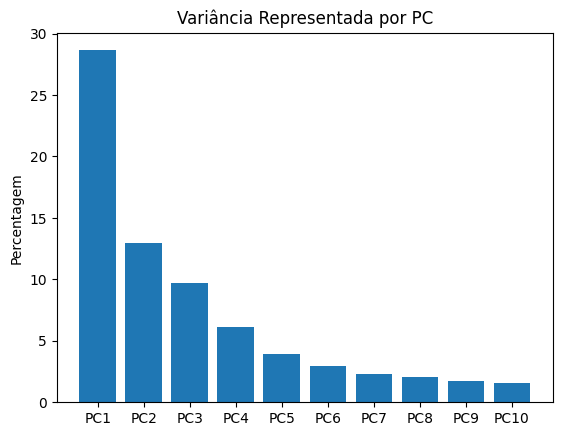

In [219]:
n = 10
pca = PCA(n_components=n)
pca.fit(data)
x_pca = pca.transform(data)

plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância Representada por PC")
plt.ylabel("Percentagem")
plt.show()

Através do gráfico resultante da análise PCA, entende-se que as features apresentam baixa capacidade de representar a variância dos dados, uma vez que tem-se um máximo de representação de variância de 25 a 30%, o que indica a necessidade de avaliar um conjunto mais extenso de PCs para representar corretamente os dados do caso.

In [220]:
# Identificar quantidade de PCs necessários para representar pelo menos 80% de variância dos dados

pca_80 = PCA(n_components=0.8)
pca_80.fit(data)
x_reduced = pca_80.transform(data)
total_pcs = x_reduced.shape[1]

print('São necessários', total_pcs, 'PCs para representar pelo menos 80% da variância dos dados.')


São necessários 19 PCs para representar pelo menos 80% da variância dos dados.


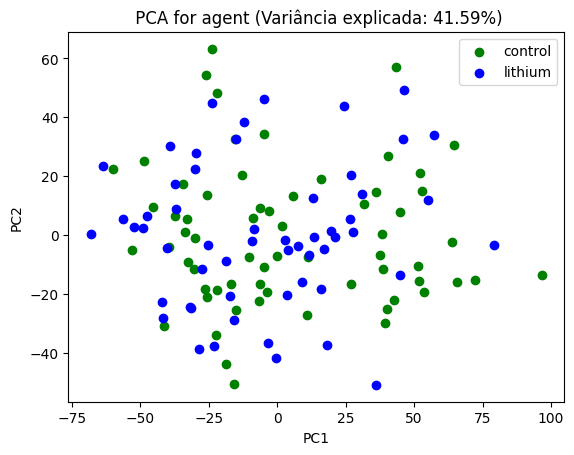

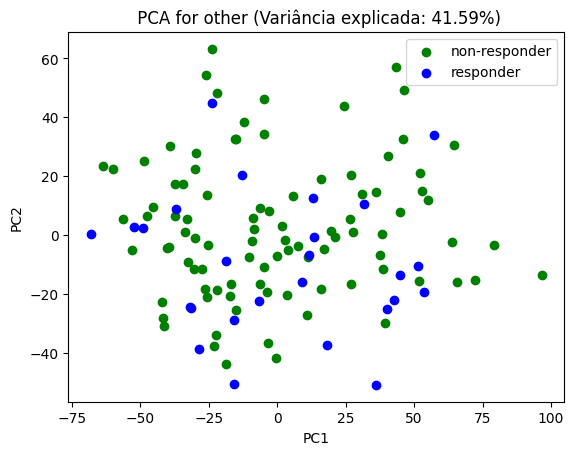

In [221]:
# Visualização por Scores Plot de coordenadas de PC1 e PC2

n_components = 2
explained_variance = pca.explained_variance_ratio_[:n_components].sum()

for class_name in ['agent','other']:
    output_data = meta[class_name].values
    plt.figure()
    for c, name in zip("gb", meta[class_name].unique()):
        plt.scatter(x_pca[output_data == name, 0], x_pca[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title(' PCA for '+ class_name + ' (Variância explicada: {:.2f}%)'.format(explained_variance*100))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()


Analisando a representação gráfica das coordenadas de PC1 e PC2, os PCs que apresentam uma maior representação da variância dos dados, não é possível distinguir agrupamentos naturais dos dados. Esta análise não proporciona indicações quanto à relação quer entre a expressão genética e o tipo de tratamento recebido, quer entre a expressão genética e a respota biológica, ou seja, se o paciente é classificado como responder ou non-responder.

Novamente, destaca-se que, apesar de o PC1 e PC2 conseguirem representar uma boa parte da variância dos dados (cerca de 42%), é ainda importante considerar mais PCs para uma melhor representação dos dados. De tal forma, não é aconcelhado qualquer redução de dimensionalidade adicional.

### t-SNE

Uma outra técnica de redução de dimensionalidade utilizada em aprendizagem máquina é a t-distributed Stochastic Neighbor Embedding (t-SNE). 

Esta técnica não-linear, também conhecida como "manifold learning", é particularmente efetiva na identificação de relações não-lineares complexas em dados de grandes dimensões, e, ainda, na visualização de clusters de dados, tanto em 2D como 3D. 

Para tal, baseia-se na preservação de distâncias em pares de pontos, com recurso a funções objetivo distintas. Assim, pela distribuição probabilística sobre pares de objetos, atribui-se uma maior probabilidade a objetos mais similares.

In [222]:
tsne = TSNE(n_components=2, n_iter=10000)
tsne_results = tsne.fit_transform(data)

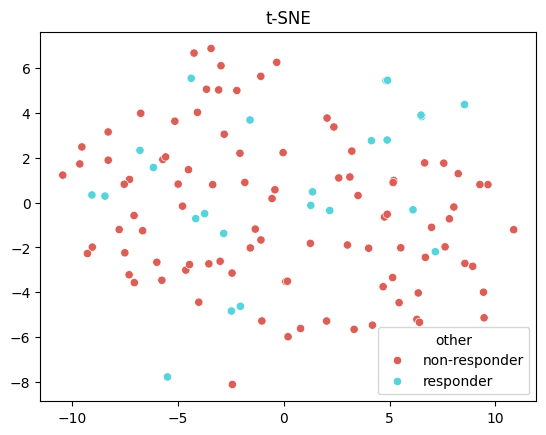

In [223]:
# Representação dos resultados por Scatterplot

fig = sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="other",
    palette=sns.color_palette("hls", 2),
    data=meta,
    legend="full",
).set(title="t-SNE")

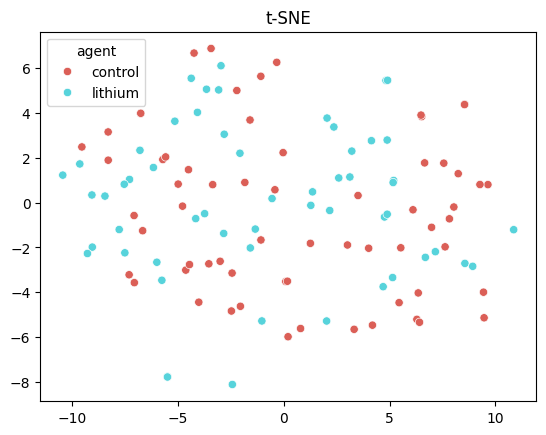

In [224]:
fig = sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue="agent",
    palette=sns.color_palette("hls", 2),
    data=meta,
    legend="full",
).set(title="t-SNE")

Deste modo, não é possível com a representação dos resultados da t-SNE visualizar clusters naturais de dados, nem distinguir relações não-lineares complexas entre os dados, quer pela classificação de resposta, quer pelo tipo de tratamento

## Aprendizagem Não-Supervisionada - Clustering de Dados

Com o intuito de procurar grupos naturais nos dados, e padrões de estruturas e de comportamentos, de modo a extrair melhores interpretações dos datasets complexos, aplicam-se frequentemente algoritmos de clustering de dados.

Assim, o clustering de dados é um método de aprendizagem não-supervisionada, em que o algoritmo agrupa ocorrências de dados semelhantes, de modo a simplificar a análise dos dados, reduzindo a sua dimensionalidade, e, ainda, permitir que sejam identificados padrões nos dados de forma autónoma. Tem-se também uma outra aplicação vantajosa associada ao clustering de dados - a identificação de anomalias e outliers nos dados.

No caso específico de investigação biológica com dados genómicos, como é o caso do estudo a analisar, os algoritmos de clustering, ao agrupar genes com funções semelhantes, proporcionam uma melhor compreensão da relação entre expressão genética e reposta biológica.

### Clustering Hierárquico

O Clustering Hierárquico é um método de análise de clusters baseado na elaboração de uma hierarquia de clusters, formada por iterações sucessivas que agrupam objetos similares. 

No caso de clustering hierárquico pela abordagem aglomerativa, mais especificamente, por métodos de linkage, a fusão de clusters é definida pela distância entre os mesmos. Depois de calculadas as distâncias entre clusters, ou seja, a dissimilaridade, os clusters com menor distância são fundidos num novo cluster, e a matriz de distância é novamente calculada.

Desta forma, com a representação visual da hierarquia de clusters por uma estrutra de árvore - um dendograma - tornam-se mais percetíveis as relações entre os dados.

Após testados os diferentes métodos de linkage, apresentam-se os métodos que produziram melhores resultados:

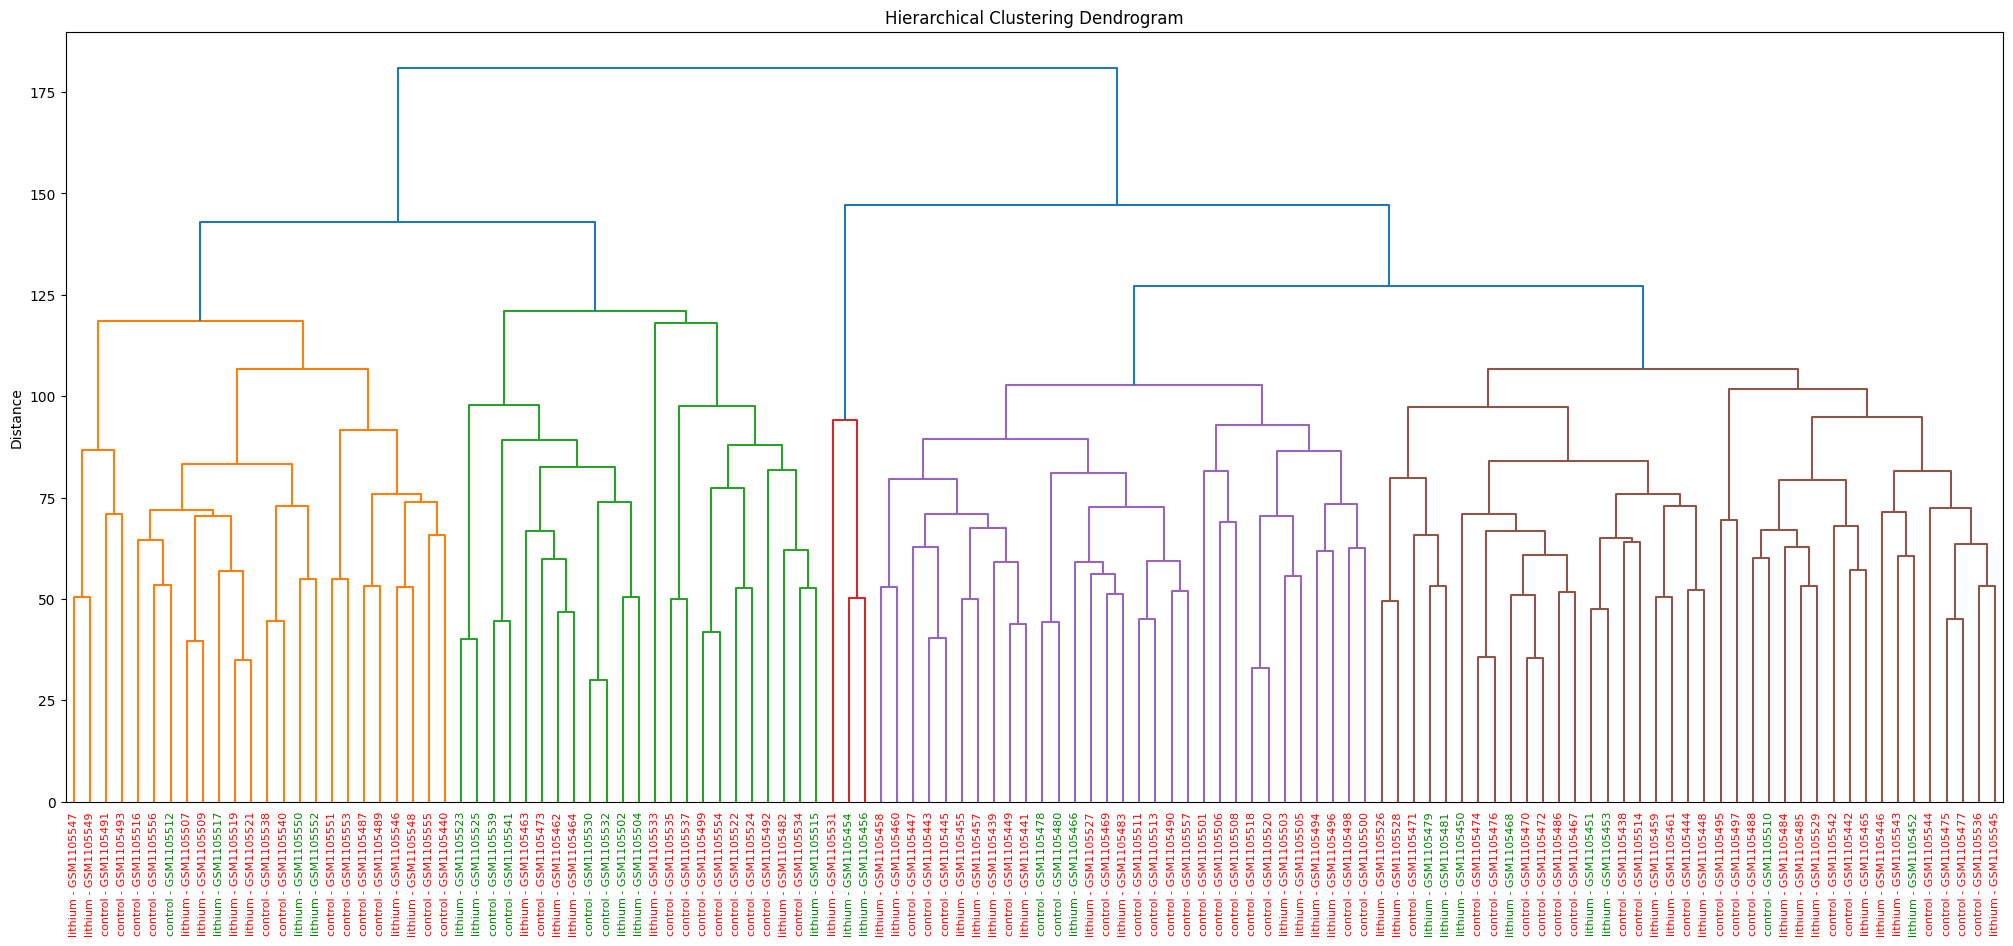

In [225]:
Z = linkage(data, method="complete")

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta.index.values, meta['agent'].values)],
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta.loc[label, 'other']]
    lbl.set_color(color)
plt.show()

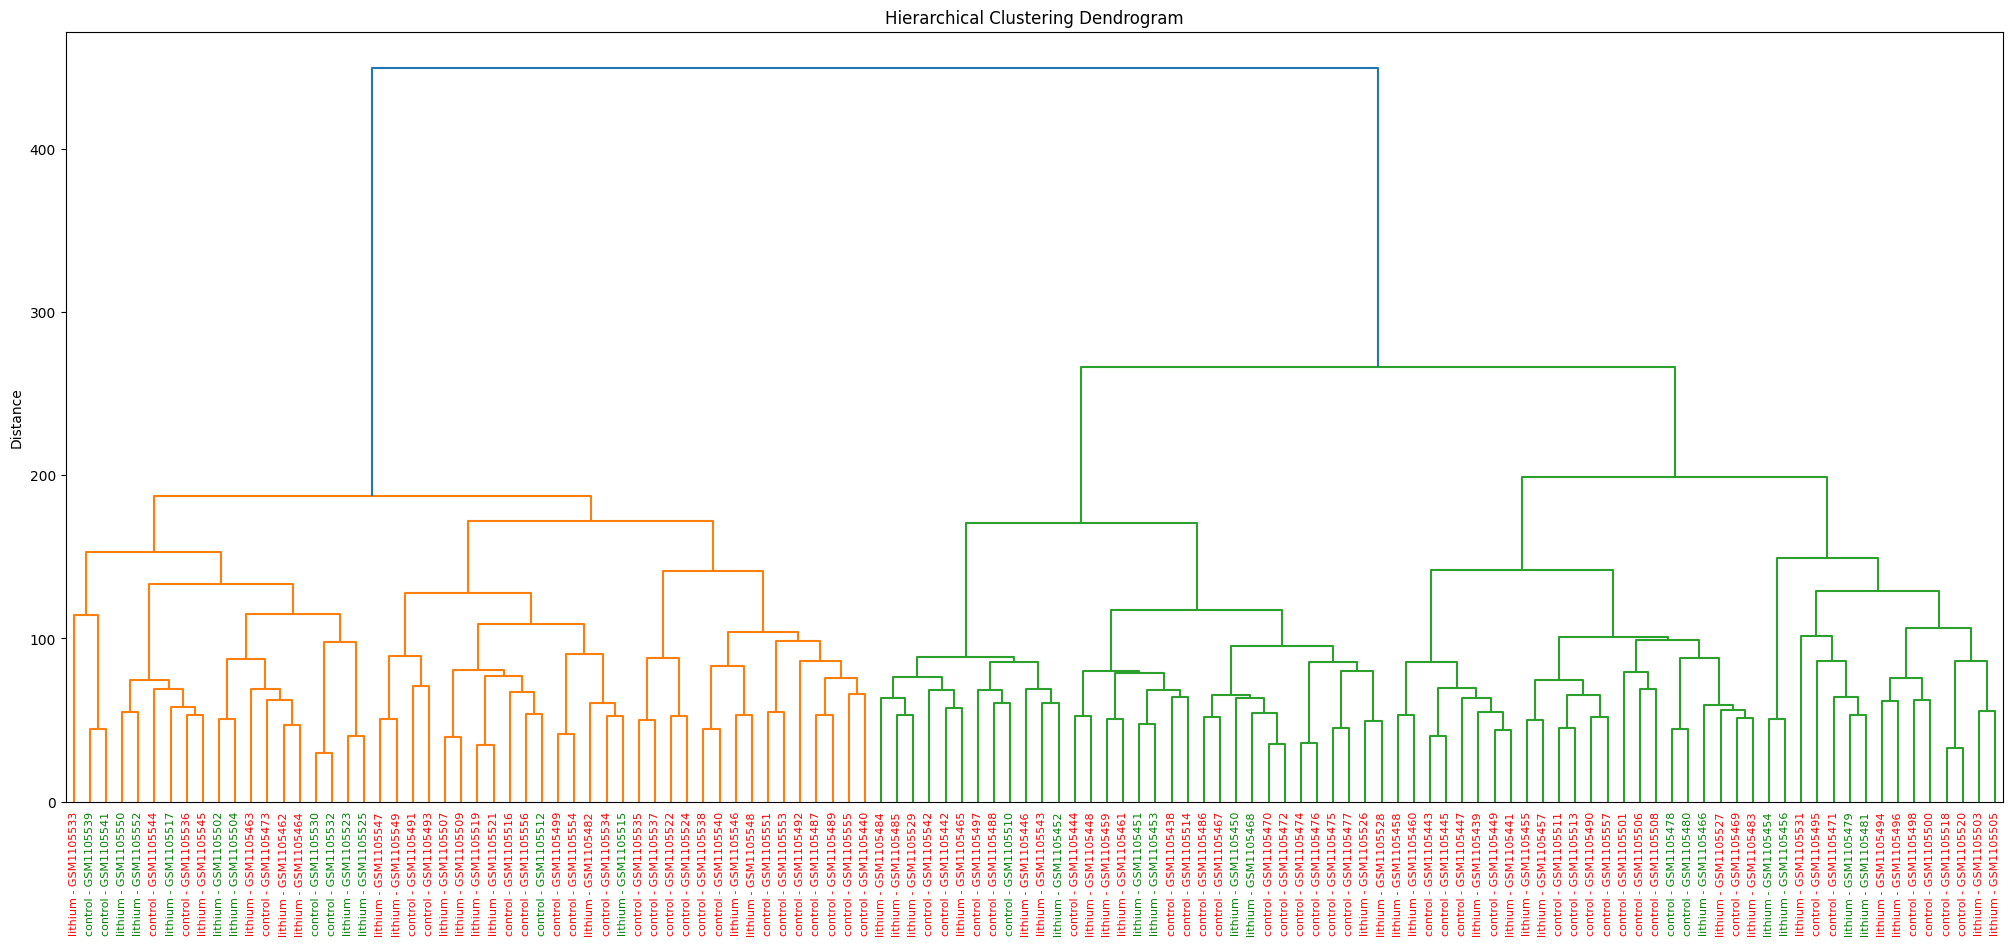

In [226]:
Z = linkage(data, method="ward")

plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels = [f"{ind} - {sample}" for sample, ind in zip(meta.index.values, meta['agent'].values)],
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')

label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    label = lbl.get_text().split(" - ")[1]
    color = label_colors[meta.loc[label, 'other']]
    lbl.set_color(color)
plt.show()

Relativamente ao dendograma resultante do clustering hierarquico efetuado pelo método de linkage completo, este demonstra a existênia de 5 grupos principais nas amostras recolhidas em diferentes tratamentos, sendo que, em cada grupo, os valores relativos à expressão genética de cada amostra se encontram mais próximos entre si. No caso do clustering hierarquico pelo método de Ward, verifica-se uma situação semelhante mas com a formação de menos grupos, pois apenas se consegue distinguir 2 agrupamentos principais. Posto isto, atendendo ao objetivo inicial de desenvoler modelos capazes de prever a classificação de pacientes ('responder' ou 'non-responder') para diferentes tratamentos, conclui-se que o método mais indicado para o clustering hierárquico é o método de Ward.

Contudo, em ambos os casos expostos, os resultados dos clusterings hierarquicos mostram incidências de overlapping de dados, isto é, ocorrências tanto de 'responders' (verde) como de 'non-responders' (vermelho) em cada grupo diferenciado. Tal implica que as conclusões a retirar são limitadas, uma vez que não é viável estabelecer uma relação entre a expressão genética induzida por um dado tratamento e o seu posterior efeito enquanto estímulo de resposta ou não-resposta ao tratamento.

### Clustering por k-Means

O clustering por k-Means é um algoritmo de aprendizagem não-supervisionada aplicado para a partição dos dados em k clusters distintos, ao agrupar dados com a intenção de minimizar as distâncias entre os pontos e os centróides dos clusters. Posto isto, a função objetivo do clutsering por k-Means beneficia clusters homogéneos, isto é, clusters com concentrações de pontos próximos do centróide.

Este tipo de clustering dá-se por concluído quando se atinge convergência - quando o centróide não altera significativamente entre iterações, ou quando é atingido o número especificado de iterações limite.

Por fim, obtem-se uma solução na qual cada ponto encontra-se atribuído a um dos k clusters, e os centróides representam o centro de cada cluster. Com isto, tem-se uma interpretação clara e direta do agrupamento de dados. 

In [227]:
k = 2
kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta['agent'], rownames=['clusters'] )

agent,control,lithium
clusters,,
0,38,33
1,26,23


Assim, com a matriz resultante da técnica de clustering de k-Means, têm-se estabelecidos 2 clusters distintos, sendo que o cluster 0 apresenta 25 ocorrências associadas ao tratamento de controlo e 22 ao tratamento com lítio, e o cluster 1 apresenta 39 ocorrências associadas ao tratamento de controlo e 34 ao tratamento com lítio. 
Podemos ver que o cluster 0 tem uma maior proporção face ao cluster 1, mas, em ambos os casos, não se verifica uma diferença significativa entre tratamentos de controlo ou com lítio.

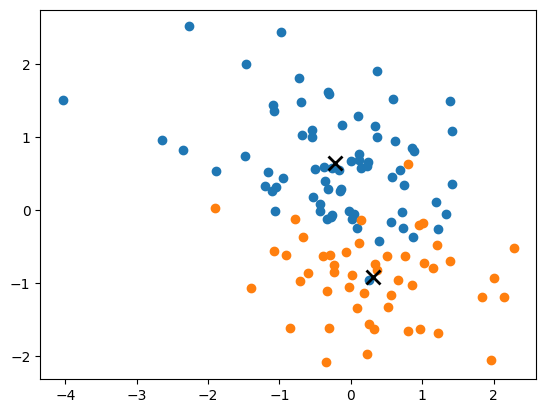

In [228]:
# Representação gráfica de centróides 2D

k = 2

for i in range(k):
    ds = data.values[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    
    plt.setp(lines,mew=2.0)    
    
plt.show()

A representação gráfica em 2D dos centróides dos clusters formados anteriormente facilita a sua visualização, no entanto tem-se uma elevada sobreposição entre os clusters, de tal forma que a distinção entre ambos não é definitiva. Com isto, não é possível distinguir de modo claro os 2 clusters formados.

## Conclusões

As técnicas de redução de dimensionalidade e de clustering de dados elaboradas ao longo desta secção foram repetidas quando se realizou a filtração de dados por variância com valores crescentes de threshold considerados, nomeadamente, 1%, 10% e 50%. Isto permitiu-nos averiguar qual o valor mais indicado, atendendo ao risco de perdas exageradas de dados e, também, o impacto deste valor nos resultados obtidos pelos algoritmos. Deste modo, conluiu-se que a opção ideal seria um threshold de 10%, cujos resultados foram apresentados acima, dado que um threshold de 1% não demonstra ser suficiente para remover variáveis de variabilidade mínima e pouca relevânica para a análise, implicando uma maior dimensão de dados a analisar, e um threshold de 50% elimina demasiadas variáveis, de tal forma a prejudicar os algoritmos aplicados de seguida, devido à perda de informação importante.

No que diz respeito aos modelos de aprendizagem não-supervisionada aqui aplicados, estes não mostraram ser os mais indicados para a previsão de resposta ao tratamento baseada na expressão genética, visto que os resultados observados não apresentam a precisão desejada e são de interpretação variável. Posto isto, considera-se prudente o desenvolvimento e aplicação de modelos de aprendizagem máquina supervisionados, com o intuito de uma melhor previsão de resposta. O seguimento deste trabalho encontra-se na Secção 3.

# Secção 3 - Modelos de Aprendizagem Máquina

## Aprendizagem Supervisionada

A aprendizagem supervisionada consiste num paradigma de Machine Learning no qual um modelo é treinado a partir de um conjunto de dados composto por entradas associadas a saídas correspondentes. Por outas palavras, o modelo conhece a resposta correta para cada situação. Desta forma, durante o processo de aprendizagem, o algoritmo utiliza estes pares input-output para adquirir a relação entre as características das entradas e saídas, de modo a tornar o modelo capaz de generalizar esse conhecimento para novos dados, para os quais as saídas ainda não são conhecidas. Para além disso, na aprendizagem supervisionada, consoante a natureza da  variável *target*, os problemas podem ser classificados em: Problema de Regressão, quando a variável de saída é contínua e quantitaTiva ou Problema de Classificação, quando o *target* é uma variável discreta. 


Consoante o caso em estudo, pretende-se estabeler o impacto da administração do tratamento com lítio na expressão genética dos pacientes com perturbação bipolar. Assim sendo, é possível inferir que o *target* será a variavél de metadados *other*, que identifica se um invidíviduo apresentou (*responder*) ou não (*non-responder*) resposta ao tratamento. Desta forma, trata-se de um problema de classificação supervisionada com o intuito de, futuramente, prever a resposta de um indivíduo ao tratamento com lítio, através dos dados de expressão genética do mesmo. 

#### "other" - prever a resposta de um indivíduo ao tratamento com lítio

In [13]:
target = meta['other']
target.value_counts() 

other
non-responder    94
responder        26
Name: count, dtype: int64

### Partição de Dados: Dados de treino + Dados de Teste

Antes da etapa de modelação, é necessário efetuar a partição de dados, essencial para avaliar e validar o desempenho dos modelos de *machine learning*. Efetuou-se, então, uma divisão de dados em conjuntos de treino e teste, segundo uma partição de 70% para dados de treino e, consequentemente, 30% para dados de teste, utilizados posteriormente para avaliar, de forma imparcial, o modelo final


In [230]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data, target, test_size=0.3, random_state=1)

print(data_X_train.shape)
print(data_X_test.shape)

(84, 4389)
(36, 4389)


In [231]:
data_X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4379,4380,4381,4382,4383,4384,4385,4386,4387,4388
32,-0.308872,-1.619179,0.962161,3.456257,0.570346,-1.416950,1.091268,-0.381421,2.373272,-0.443078,...,2.208687,-0.082232,-2.349454,3.214648,2.003678,2.267581,-1.619393,3.189826,1.349990,1.816694
80,-0.315546,1.622935,-0.574471,0.359877,-0.569169,0.585787,-0.550100,-0.103353,-0.214445,1.287577,...,-0.033460,1.197185,1.425763,0.127306,0.094305,0.267065,-2.078049,-0.748956,1.340576,0.462012
38,0.233501,0.607146,0.144577,-0.417640,-0.523243,0.513037,-0.683299,-1.905527,-0.450041,0.280021,...,-1.438983,0.130853,1.321394,-0.927196,-0.741116,-1.335398,0.763644,-0.896036,0.185750,-1.123842
19,-0.604059,-0.863206,0.629619,2.758344,1.647377,-0.460103,0.033938,-1.526956,0.572523,-0.289798,...,1.180523,-1.958676,0.239979,-0.049924,-2.361368,-0.342026,0.880196,-0.346159,-1.015477,-1.240972
119,-1.065833,-0.014639,4.135359,2.915627,-0.866247,2.857641,-2.819401,1.047625,-1.690900,1.768072,...,0.967768,-0.769184,0.559170,-0.564163,-2.148001,0.183015,1.156169,-0.636403,0.885303,-2.350512


Após a partição, revela-se necessário verificar a distribuição do target nos conjuntos de treino e teste, de modo a ser possível inferir sobre o impacto nos resultados futuros. Na verdade, uma distribuição desigual pode introduzir alguma distorção e afetar a capacidade de previsão do modelo para novos dados, resultando num desempenho inadequado que culmina em previsões menos precisas para as classes de interesse. 

other
non-responder    69
responder        15
Name: count, dtype: int64


<Axes: ylabel='count'>

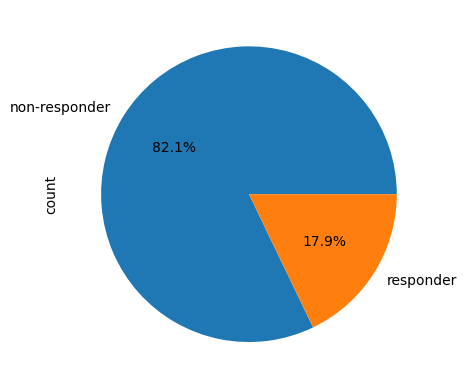

In [232]:
# Verificar se a distribuição do target é a mesma no treino e teste
counts_train = data_y_train.value_counts()
print(counts_train)

counts_train.plot.pie(autopct='%1.1f%%')


other
non-responder    25
responder        11
Name: count, dtype: int64


<Axes: ylabel='count'>

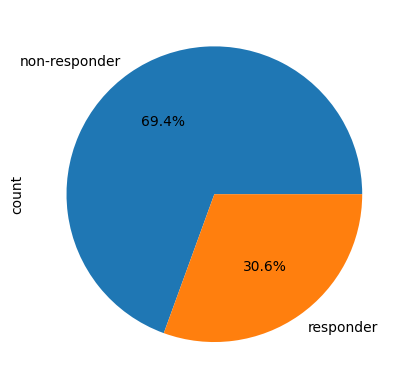

In [233]:
counts_test = data_y_test.value_counts()
print(counts_test)

counts_test.plot.pie(autopct='%1.1f%%')

Assim, através do plot destes gráficos de setores, é possível concluir que a distribuição do target não é semelhante nos conjuntos de treino e teste, sendo indicativo que o modelo pode apresentar alguma dificuldade na capacidade de efetuar previsões confiáveis, uma vez que o processo de treino é efetuado com um rácio superior de indivíduos que não responderam face aos que responderam ao tratamento.

Posto isto, optamos por testar uma partição de 60% de dados de treino e, consequentemente, 40% de dados de teste.


In [14]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data, target, test_size=0.4, random_state=1)

print(data_X_train.shape)
print(data_X_test.shape)

(72, 4389)
(48, 4389)


other
non-responder    59
responder        13
Name: count, dtype: int64


<Axes: ylabel='count'>

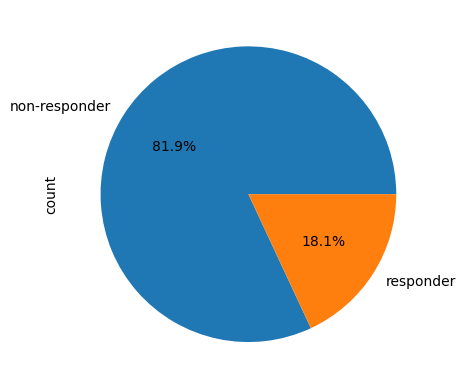

In [15]:
# Verificar se a distribuição do target é a mesma no treino e teste
counts_train = data_y_train.value_counts()
print(counts_train)

counts_train.plot.pie(autopct='%1.1f%%')


other
non-responder    35
responder        13
Name: count, dtype: int64


<Axes: ylabel='count'>

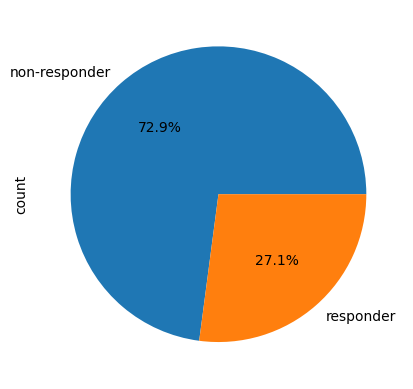

In [16]:
counts_test = data_y_test.value_counts()
print(counts_test)

counts_test.plot.pie(autopct='%1.1f%%')

Apesar de se verificarem melhorias, as distribuições continuam a não ser as mais indicados, no entanto, não consideramos sensato uma partição de dados de 50-50, pelo que, segue-se com apartição 60-40.

Para além disso,oberva-se uma distribuição correspondente a um conjunto de dados desbalanceado, uma vez que a classe *non-responder* é representada por uma proporção muito maior que a classe *responder*. Ainda, como uma das classes contém mais de 80% dos dados, não se pode aferir que um modelo com uma *accuracy*de 80% seja particularmente bom. Assim, é importante avaliar o desempenho dos modelos segundo outras métricas, de que são exemplo *precision*, *recall*, *f1-score* e curva ROC, de modo a obter uma avaliação mais confiável do desempenho dos modelos. 

## Aplicação de Modelos Supervisionados de Machine Learning e Avaliação dos Modelos

Como mencionado anteriormente, o caso em estudo trata-se de um problema de classificação, o que restringe os modelos de ML disponíveis para a sua modelação. Com efeito, por entre os vários modelos estudados, serão aplicados, de seguida, 5 algoritmos de Aprendizagem Máquina: Árvore de Decisão, Regressão Logística, SVM, Naive-Bayes e KNN, com o intuito de comparar o seu comportamento no conjunto de dados.Assim, tem-se como objetivo determinar qual o algoritmo que melhor se adapta ao contexto da classificação desejada. Na execução dos referidos modelos, estes serão criados com o respetivo construtor, treinados segundo a função *fit* e, posteriormente, utilizados para fazer as previsões segundo a função *predict*.



Importante referir que a etapa de padronização dos dados é uma etapa essencial na preparação dos dados, devendo ser realizada antes da aplicação destes modelos. O mesmo se encontra verificado, uma vez que esta etapa foi executada nas secções anteriores.




Relativamente à Avaliação dos Modelos, consiste num processo que mede o desempenho e eficácia dos algoritmos aplicados a dados de teste, ou seja, a dados não vistos durante o processo de treino. Existem várias métricas de avaliação frequentemente utilizadas, dependendo da natureza do problema: Regressão ou Classificação. Visto se tratar de um problema de classificação, o desempenho dos modelos será avalidado consoante as seguintes métricas de erro: 

- Matriz de Confusão:Tabela que compara as previsões do modelo com os valores reais do conjunto de teste, apresentando o número de verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN). A partir desta é possível determinar:  

        - Accuracy: Proporção de previsões corretas em relação ao total de previões;  

        - Precision: Razão entre os verdadeiros positivos e o total de instâncias previstas como positivas;  

        - Recall(Sensibilidade): Proporção entre os verdadeiros positivos e o total de instâncias positivas no conjunto de dados.  
        
        - F1-Score: Combina precisão e recall num único valor de avaliação dos modelos. É utilizada em problemas de classificação desbalanceados, onde uma classe apresenta mais prevalência do que a outra e é particularmente útil em situações em que tanto falsos positivos quanto falsos negativos são importantes.
        
    
- Área sob a Curva ROC (AUC): A curva ROC representa graficamente a relação entre a taxa de verdadeios positivos e a taxa de falsos positvos, sendo a área sob essa curva uma medida da capacidade de distinção entre classes do modelo, variando entre 0 e 1, onde um valor maior indica um melhor desempenho. 

Uma análise conjunta das várias métricas de desempenho possibilita uma melhor compreensão e, consequente, avaliação mais detalhada do desempenho do modelo.


### Árvore de Decisão

Um Modelo de Árvore de Decisão é um algoritmo de ML que consiste num grafo hierarquizado, onde cada nó especifica um teste para o valor de uma determinada *feature* de entrada e cada ramo representa o resultado dessa decisão. As folhas da árvore contêm as previsões finais do valor para o atributo de saída. 


In [17]:
# Criação do Modelo

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(data_X_train, data_y_train)

tree_y_pred = tree_model.predict(data_X_test)

Accuracy: 0.77
Precision: 0.75
Recall: 0.77
F1-score: 0.75


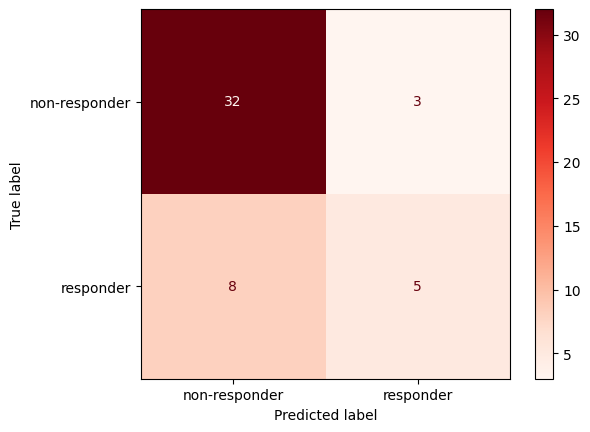

In [18]:
# Avaliação Modelo: Matriz de Confusão
tree_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, tree_y_pred, display_labels=tree_model.classes_, cmap='Reds')
tree_cm

print('Accuracy: %0.2f' % tree_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, tree_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, tree_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, tree_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 77%, o que indica que é capaz de prever corretamente 77% dos casos; *precision* = 75%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 77%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 75%, que sugere um bom equilíbro ente a precisão e sensibilidade do modelo. Previu corretamente a ausência de resposta em 32 dos casos e obtenção de resposta ao tratamento em 5 dos casos. 

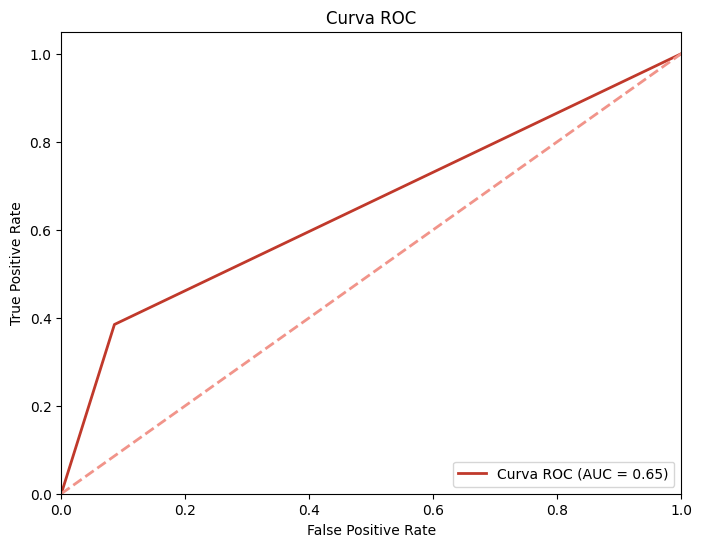

In [49]:
# Avaliação Modelo: Curva ROC

# Especificar explicitamente qual a classe positiva
pos_label = 'responder'
tree_y_probs = tree_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, tree_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



Uma AUC de 0.65 (superior a 0.5) demonstra a capacidade moderada do modelo de distinguir entre as classes responder e non-responder, sugerindo uma performance do modelo superior a uma escolha aleatória. 

### Regressão Logística

Um modelo de Regressão Logística é um modelo estatístico utilizado para problemas de classificação binária. Assim, prevê a probabilidade de um atributo pertencer a uma classe específica, com auxílio de uma curva logística. 


In [19]:
# Criação do Modelo

logistic = linear_model.LogisticRegression(C=1e5, solver = "liblinear", multi_class = "auto")
logistic.fit(data_X_train, data_y_train)

logistic_y_pred = logistic.predict(data_X_test)

Accuracy: 0.52
Precision: 0.77
Recall: 0.52
F1-score: 0.53


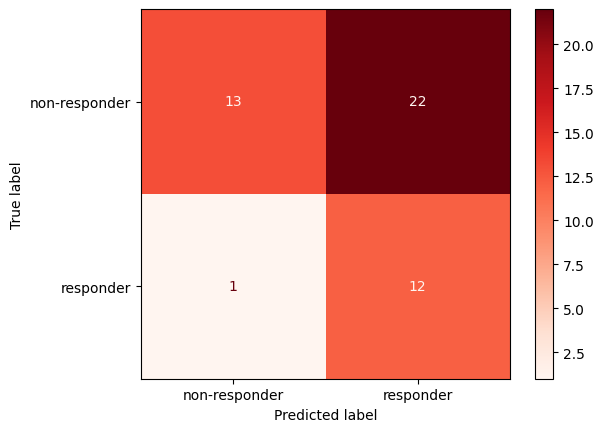

In [20]:
# Avaliação Modelo: Matriz de Confusão
logistic_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, logistic_y_pred, display_labels=logistic.classes_, cmap='Reds')
logistic_cm

print('Accuracy: %0.2f' % logistic.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, logistic_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, logistic_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, logistic_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 52%, o que indica que é capaz de prever corretamente 52% dos casos; *precision* = 77%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 52%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 53%, que sugere  equilíbro entre a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 13 dos casos e obtenção de resposta ao tratamento em 12 dos casos. 

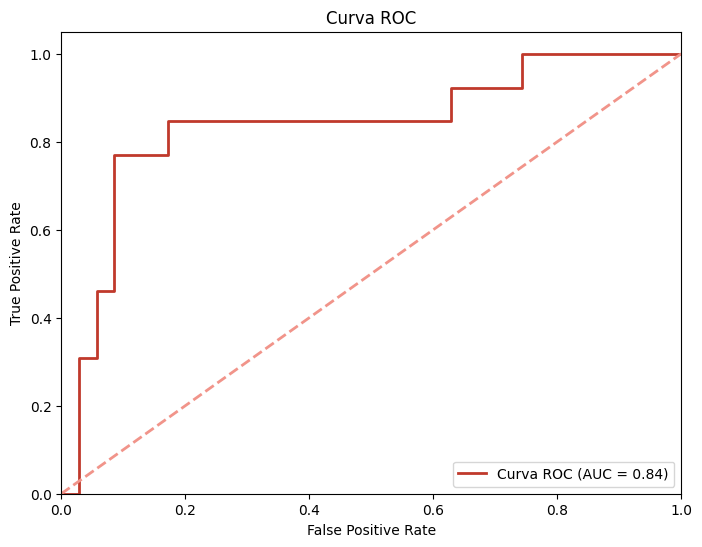

In [21]:
# Avaliação Modelo: Curva ROC

pos_label = 'responder'
lr_y_probs = logistic.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, lr_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


Uma AUC de 0.84 demonstra uma capacidade do modelo de distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0.5).

### SVM

Um modelo SVM (Support Vector Machine) é um algoritmo de ML que, num contexto de classificação, possui como objetivo encontrar o hiperplano ideal que melhor separa os dados em diferentes classes no espaço multidimensional. A escolha desse hiperplano recai sobre o que maximiza a margem, isto é, a distância entre os vetores de suporte e o hiperplano. 



In [22]:
# Criação do Modelo

svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(data_X_train, data_y_train)

svm_y_pred = svm_model.predict(data_X_test)

Accuracy: 0.88
Precision: 0.89
Recall: 0.88
F1-score: 0.86


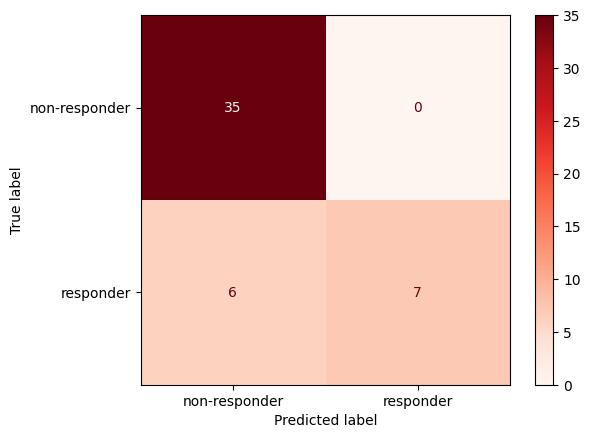

In [23]:
# Avaliação Modelo: Matriz de Confusão
svm_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Reds')
svm_cm

print('Accuracy: %0.2f' % svm_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, svm_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, svm_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 88%, o que indica que é capaz de prever corretamente 88% dos casos; *precision* = 89%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 88%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 86%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 35 dos casos e obtenção de resposta ao tratamento em 7 dos casos.

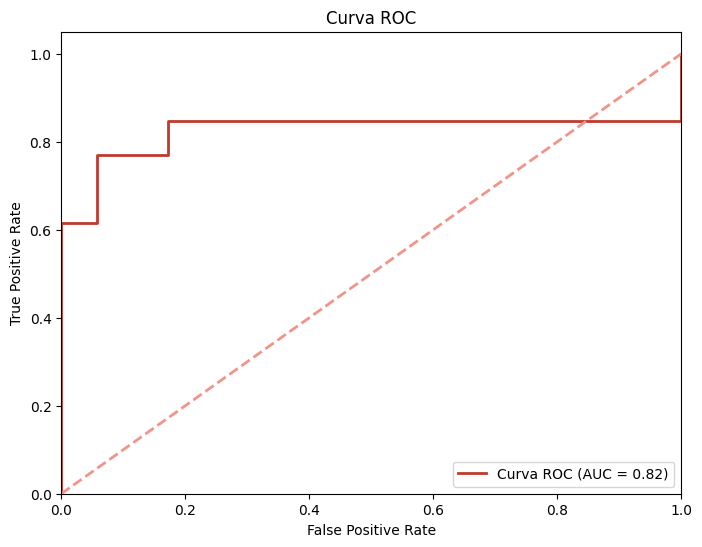

In [24]:
# Avaliação Modelo: Curva ROC

pos_label = 'responder'
svm_y_probs = svm_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, svm_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Uma AUC de 0.82 demonstra uma capacidade do modelo de distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0.5).

### KNN

O modelo KNN (K-Nearest Neighbors) é um algoritmo de aprendizagem supervisionada, cuja ideia central reside na classificar ou prever um novo ponto de dados com base na maioria dos "k" pontos de dados mais próximos a ele no espaço de características. A distância entre pontos é geralmente medida usando métricas como distância euclidiana, distância de Manhattan, distância de Minkowski, entre outras.

In [25]:
# Criação do Modelo

# Certifique-se de que 'data_X_train' e 'data_y_train' estão em ordem contígua

data = np.ascontiguousarray(data)
target = np.ascontiguousarray(target)

knn_model = KNeighborsClassifier()
knn_model.fit(data_X_train, data_y_train)

# Certifique-se de que 'data_X_test' está em ordem contígua
data_X_test = np.ascontiguousarray(data_X_test)


knn_y_pred = knn_model.predict(data_X_test)

Accuracy: 0.77
Precision: 0.83
Recall: 0.77
F1-score: 0.70


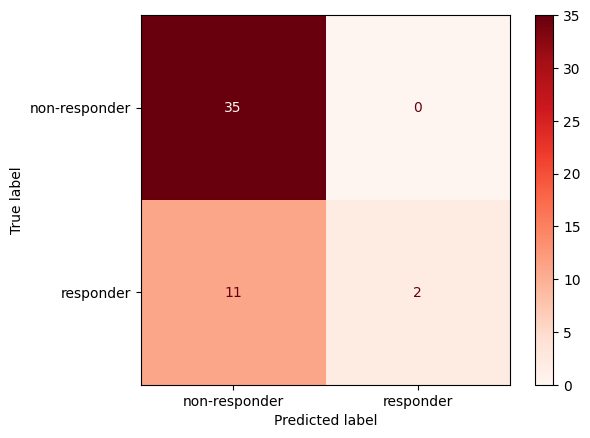

In [26]:
# Avaliação Modelo: Matriz de Confusão
knn_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, knn_y_pred, display_labels=knn_model.classes_, cmap='Reds')
knn_cm

print('Accuracy: %0.2f' % knn_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, knn_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, knn_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, knn_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 77%, o que indica que é capaz de prever corretamente 77% dos casos; *precision* = 83%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 77%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 70%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 35 dos casos e obtenção de resposta ao tratamento em apenas 2 dos casos.

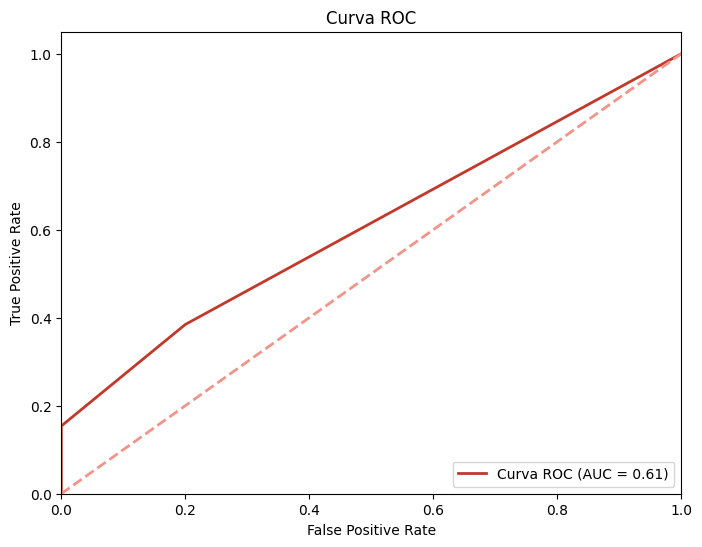

In [27]:
# Avaliação Modelo: Curva ROC

pos_label = 'responder'
knn_y_probs = knn_model.predict_proba(data_X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(data_y_test, knn_y_probs, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A obtenção de uma AUC de 0,61 demonstra uma capacidade do modelo distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0,5).

### Naive Bayes

O modelo de Naive Bayes é um algoritmo de aprendizagem supervisionada baseado no Teorema de Bayes.

In [28]:
# Criação do Modelo

nb_model = GaussianNB()
nb_model.fit(data_X_train, data_y_train)

nb_y_pred = nb_model.predict(data_X_test)

Accuracy: 0.81
Precision: 0.80
Recall: 0.81
F1-score: 0.80


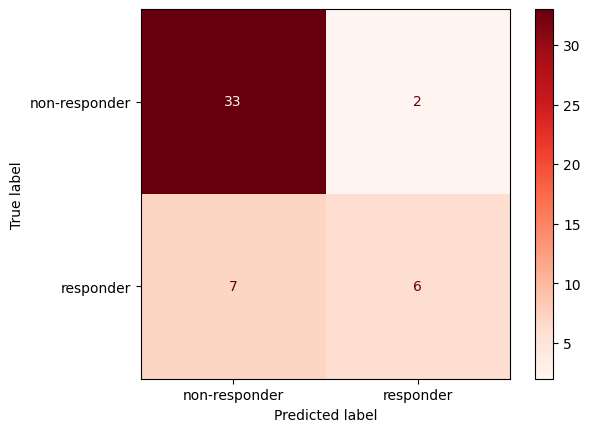

In [29]:
# Avaliação Modelo: Matriz de Confusão
nb_cm = ConfusionMatrixDisplay.from_predictions(data_y_test, nb_y_pred, display_labels=nb_model.classes_, cmap='Reds')
knn_cm

print('Accuracy: %0.2f' % nb_model.score(data_X_test, data_y_test))
print('Precision: %0.2f' % precision_score(data_y_test, nb_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(data_y_test, nb_y_pred, average='weighted'))
print('F1-score: %0.2f' % f1_score(data_y_test, nb_y_pred, average='weighted'))

O modelo apresenta uma percentagem: *accuracy* = 81%, o que indica que é capaz de prever corretamente 81% dos casos; *precision* = 80%, que evidencia a boa capacidade do modelo de evitar a classificação incorreta de casos negativos (*non-responder*) como positivos (*responder*); *recall* = 81%, o que é indicador de uma boa sensibilidade em identificar os casos positivos e, ainda, *f1-score* = 80%, que sugere equilíbro ente a precisão e sensibilidade do modelo, podendo ser influenciado pelo desequilíbrio na distribuição das classes.
Previu corretamente a ausência de resposta em 33 dos casos e obtenção de resposta ao tratamento em 6 dos casos.

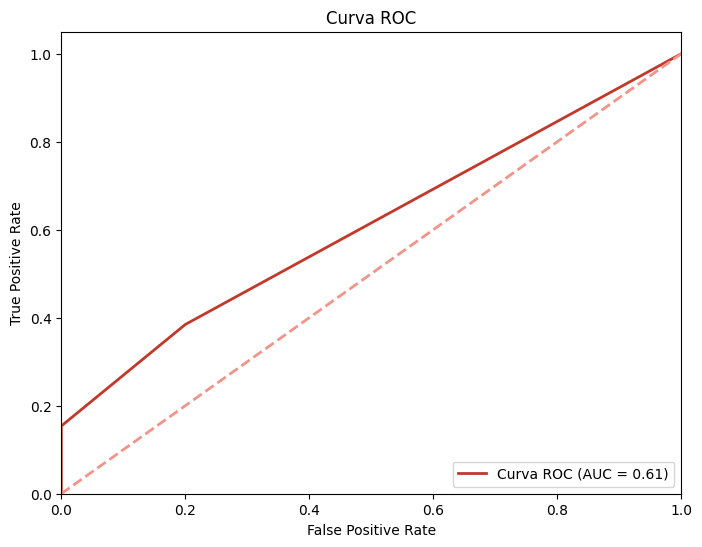

In [30]:
binary_y_true = (data_y_test == 'responder').astype(int)
nb_y_prob = nb_model.predict_proba(data_X_test)[:, 1]

# Calculando a curva ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(binary_y_true, nb_y_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)


# Desenhar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#C0392B', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#F1948A' , lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

A obtenção de uma AUC de 0,61 demonstra uma capacidade do modelo distinguir entre as classes responder e non-responder superior a um modelo aleatório (AUC=0,5).

##  Métodos de Estimação de Erro

### Cross validation

A validação cruzada é um processo de validação que divide o conjunto de dados em k *folds* mutuamente exclusivos, onde o modelo é treinado k vezes, usando k-1 partes para treino e a parte restante para teste. Este procedimento é repetido várias vezes, cada vez com uma combinação diferente de partes como conjunto de teste e treino, de forma a garantir que utiliza todos os dados. No final de todas as iterações, calcula-se a *accuracy*, obtendo-se, assim, uma medida mais confiável sobre a capacidade de previsão do modelo em questão. 

In [31]:
# Árvore Decisão
scores_tree_cv = cross_val_score(estimator=tree_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_tree_cv)     
print('Mean accuracy: %0.2f' % scores_tree_cv.mean())

Accuracy values: [0.91666667 0.875      0.91666667 0.75       0.79166667]
Mean accuracy: 0.85


O modelo apresenta uma *accuracy* média de 85%, o que indica que a Árvore de Decisão é capaz de prever corretamente em 85% dos casos. Neste caso já não se verificam diferenças significativas entre os valores de *accuracy* dos diferentes *folds*, sendo esta consistência indicadora de um desempenho mais estável e robusto do modelo, nas diferentes divisões dos dados. 

In [32]:
# Regressão Logística
scores_lr_cv = cross_val_score(estimator=logistic, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_lr_cv)    
print('Mean accuracy: %0.2f' % scores_lr_cv.mean())

Accuracy values: [0.41666667 0.25       0.45833333 0.41666667 0.29166667]
Mean accuracy: 0.37


O modelo apresenta uma *accuracy* média de 37%, o que indica que a Regressão Logística é capaz de prever corretamente em 37% dos casos. Também, verifica-se alguma variação entre os valores de *accuracy* das diferentes *folds*, o que pode ser indicativo da sensibilidade do modelo à forma como os dados são divididos, apresentando o modelo mais sensibilidade a diferentes partições dos dados. 

In [33]:
# SVM
scores_svm_cv = cross_val_score(estimator=svm_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_svm_cv)     #Aqui ja não calula r2 e sim a accuracy para cada fold
print('Mean accuracy: %0.2f' % scores_svm_cv.mean())

Accuracy values: [0.83333333 0.95833333 1.         0.91666667 0.95833333]
Mean accuracy: 0.93


O modelo apresenta uma *accuracy* média de 93%, o que indica que o modelo SVM é capaz de prever corretamente em 93% dos casos. Mais uma vez, não se verificam diferenças significativas entre os valores de *accuracy* dos diferentes *folds*, sendo esta consistência indicadora de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados. 

In [34]:
# KNN
scores_knn_cv = cross_val_score(estimator=knn_model, X=data, y=target, cv=5)


print('Accuracy values:', scores_knn_cv)     
print('Mean accuracy: %0.2f' % scores_knn_cv.mean())

Accuracy values: [0.875      0.83333333 0.83333333 0.79166667 0.75      ]
Mean accuracy: 0.82


O modelo apresenta uma accuracy média de 82%, o que indica que o modelo KNN é capaz de prever corretamente em 82% dos casos. É possível constatar que não existem diferenças significativas entre os valores de accuracy dos diferentes folds, sendo tal indicador de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados.

In [35]:
# NB
scores_nb_cv = cross_val_score(estimator=nb_model, X=data, y=target, cv = 5) # 5 folds

print('Accuracy values:', scores_nb_cv)     
print('Mean accuracy: %0.2f' % scores_nb_cv.mean())

Accuracy values: [0.875      0.875      0.83333333 0.66666667 0.83333333]
Mean accuracy: 0.82


O modelo apresenta uma accuracy média de 82%, o que indica que o modelo de Naive Bayes é capaz de prever corretamente em 82% dos casos. É possível constatar que não existem diferenças significativas entre os valores de accuracy dos diferentes folds, sendo tal indicador de um desempenho mais estável e robusto do modelo, perante diferentes divisões dos dados.

### Stratified Cross Validation

A Stratified Cross Validation é uma técnica utilizada para garantir que as proporções das classes alvos sejam mantidas em cada fold. Assim sendo, esta será uma técnica de avaliaçao mais adequada para a nossa análise uma vez que estamos perante um caso de dados desbalanceados.

In [36]:
# Criar modelo stratified
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
# Árvore Decisão

tree_strat = cross_val_score(estimator=tree_model, X=data, y=target, cv=stratified_kfold)

print('Accuracy values:', tree_strat)     
print('Mean accuracy: %0.2f' % tree_strat.mean())

Accuracy values: [0.83333333 0.66666667 0.91666667 0.91666667 0.79166667]
Mean accuracy: 0.82


In [38]:
# Regressão Logística

log_strat = cross_val_score(estimator=logistic, X=data, y=target, cv=stratified_kfold)

print('Accuracy values:', log_strat)     
print('Mean accuracy: %0.2f' % log_strat.mean())

Accuracy values: [0.41666667 0.375      0.54166667 0.375      0.33333333]
Mean accuracy: 0.41


In [39]:
# SVM

svm_strat = cross_val_score(estimator=svm_model, X=data, y=target, cv=stratified_kfold)

print('Accuracy values:', svm_strat)     
print('Mean accuracy: %0.2f' % svm_strat.mean())

Accuracy values: [1.         0.91666667 0.875      1.         0.95833333]
Mean accuracy: 0.95


In [40]:
# KNN

knn_strat = cross_val_score(estimator=knn_model, X=data, y=target, cv=stratified_kfold)

print('Accuracy values:', knn_strat)     
print('Mean accuracy: %0.2f' % knn_strat.mean())

Accuracy values: [0.79166667 0.875      0.875      0.875      0.70833333]
Mean accuracy: 0.82


In [41]:
# NB

nb_strat = cross_val_score(estimator=nb_model, X=data, y=target, cv=stratified_kfold)

print('Accuracy values:', nb_strat)     
print('Mean accuracy: %0.2f' % nb_strat.mean())

Accuracy values: [0.83333333 0.83333333 0.79166667 0.75       0.79166667]
Mean accuracy: 0.80


Esta mostra ser uma técnica com resultados de maior confiança, o que permite avaliar o desempenho dos modelos, deduzindo conclusões válidas, ultrapassando o problema do desbalanceamento de dados. Em geral, foi possível averiguar que através da avaliação por stratified cross validation, o modelo que apresenta um melhor desempenho é o SVM, com uma accuracy média de 95%. Por outro lado, o modelo com pior desempenho continua a ser o modelo de regressão logística, com uma accuracy média de 41%. 

## Avaliação dos Modelos ML

### Avaliação dos Modelos ML por accuracy

In [42]:
def model_evaluation_accuracy(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred):
    print("\nPercentagem de exemplos corretamente previstos:")
    print("Decision Tree: %0.2f" % accuracy_score(data_y_test,tree_y_pred))
    print("Regressão Logística: %0.2f" % accuracy_score(data_y_test, logistic_y_pred))
    print("SVMs: %0.2f" % accuracy_score(data_y_test, svm_y_pred))
    print("KNeighbors: %0.2f" % accuracy_score(data_y_test, knn_y_pred))
    print("Naive Bayes: %0.2f" % accuracy_score(data_y_test, nb_y_pred))
    
model_evaluation_accuracy(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred)


Percentagem de exemplos corretamente previstos:
Decision Tree: 0.77
Regressão Logística: 0.52
SVMs: 0.88
KNeighbors: 0.77
Naive Bayes: 0.81


Avaliando conjuntamente os modelos de machine learning desenvolvidos, tendo em conta o score de accuracy, é possível concluir que os modelos de Naive Bayes e SVM apresentam um valor de accuracy superior, permitindo aferir que estes são capazes de prever corretamente 81% e 88% dos casos de teste, respetivamente. Além do mais, o modelo de Regressão Logística apresenta o menor valor de accuracy, 52%, entre os modelos desenvolvidos. Pela avaliação por accuracy, o melhor modelo a aplicar seria o SVM.

Atendendo ao que foi previamente esclarecido, como a métrica de accuracy não demonstra ser a mais indicada, prossegiu-se com a avaliação dos modelos Machine Learning por outras métricas.

### Avaliação dos Modelos ML por precision

In [46]:
def model_evaluation_precision(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred):
    print("\nResultados de Percentagem de Precision:")
    print("Decision Tree: %0.2f" % precision_score(data_y_test, tree_y_pred, average='weighted'))
    print("Regressão Logística: %0.2f" % precision_score(data_y_test, logistic_y_pred, average='weighted'))
    print("SVMs: %0.2f" % precision_score(data_y_test, svm_y_pred, average='weighted'))
    print("KNeighbors: %0.2f" % precision_score(data_y_test, knn_y_pred, average='weighted'))
    print("Naive Bayes: %0.2f" % precision_score(data_y_test, nb_y_pred, average='weighted'))
    
model_evaluation_precision(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred)


Resultados de Percentagem de Precision:
Decision Tree: 0.75
Regressão Logística: 0.77
SVMs: 0.89
KNeighbors: 0.83
Naive Bayes: 0.80


Quanto à avaliação dos modelos por precision, é possível determinar que os modelos com melhores resultados foram o SVM e o KNN, com 89 e 83% de precision, respetivamente. Ao contrário do observado na avaliação por accuracy, quando a considerar a métrica de precision, o modelo de Árvore de Decisão mostra ter o pior desempenho, com um precision de 75%. Com esta avaliação, continua-se a considerar como melhor opção o modelo de SVM.

### Avaliação dos Modelos ML por F1-score

In [45]:
def model_evaluation_f1(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred):
    print("\nResultados de F1-scores:")
    print("Decision Tree: %0.2f" % f1_score(data_y_test,tree_y_pred, average='weighted'))
    print("Regressão Logística: %0.2f" % f1_score(data_y_test, logistic_y_pred, average='weighted'))
    print("SVMs: %0.2f" % f1_score(data_y_test, svm_y_pred, average='weighted'))
    print("KNeighbors: %0.2f" % f1_score(data_y_test, knn_y_pred, average='weighted'))
    print("Naive Bayes: %0.2f" % f1_score(data_y_test, nb_y_pred, average='weighted'))
    
model_evaluation_f1(data_y_test, tree_y_pred,logistic_y_pred, svm_y_pred, nb_y_pred, knn_y_pred)


Resultados de F1-scores:
Decision Tree: 0.75
Regressão Logística: 0.53
SVMs: 0.86
KNeighbors: 0.70
Naive Bayes: 0.80


Pela avaliação dos modelos por f1-score, foi possível ver que os modelos com melhores resultados foram o SVM e o Naive Bayes, com scores de 86% e 80%, respetivamente, enquanto que o modelo que apresentou o pior resultado foi o modelo de Regressão Logística, com um score de 53%. Assim sendo, conclui-se, novamente, que o modelo mais indicado seria o modelo de SVM.

### Avaliação dos Modelos ML por stratified cross-validation

In [47]:
def model_evaluation_strat_crossval(tree_strat, log_strat, svm_strat, knn_strat, nb_strat):
    print("\n Accuracy média (por stratified cross-validation):")
    print("Decision Tree: %0.2f" % tree_strat.mean())
    print("Regressão Logística: %0.2f" % log_strat.mean())
    print("SVMs: %0.2f" % svm_strat.mean())
    print("KNeighbors: %0.2f" % knn_strat.mean())
    print("Naive Bayes: %0.2f" % nb_strat.mean())

model_evaluation_strat_crossval(tree_strat, log_strat, svm_strat, knn_strat, nb_strat)


 Accuracy média (por stratified cross-validation):
Decision Tree: 0.82
Regressão Logística: 0.41
SVMs: 0.95
KNeighbors: 0.82
Naive Bayes: 0.80


Avaliando conjuntamente os modelos de machine learning desenvolvidos, tendo em conta a accuracy média obtida durante a stratified cross-validation, é possível concluir que os modelos de Árvores de Decisão, de KNN e de SVM apresentam valores de accuracy média superiores, permitindo aferir que estes são capazes de prever corretamente 82% e 95% dos casos, respetivamente. De facto, estes modelos apresentam um desempenho bastante sólido, em média. Além do mais, o modelo de Regressão Logística apresenta, novamente, o menor valor de accuracy média, 41%, entre os modelos desenvolvidos. De igual modo às avaliações anteriores, considera-se ainda o melhor modelo como sendo o modelo de SVM.

## Ensemble Model

Ideia central da construção de ensemble models reside na obtenção de respostas a situações novas, a partir da combinação das respostas de diferentes modelos. De facto, a construção de ensemble models permite combinar as previsões de vários modelos individuais de modo a obter um desempenho otimizado, relativamente do que o desempenho individual. Assim, usando os diferentes modelos desenvolvidos posibilita o aprimoramento da precisão e da robustez dos resultados. 

### Voting Classifier

A utilização do Voting Classifier, na construção de um ensemble model, permite combinar vários modelos de aprendizagem supervisionada para tomar decisões por votação. 
Nos modelos desenvolvidos foi considerada a "hard voting", na medida em que as previsões de cada modelo são consideradas no ensemble model, e a classe que recebe a maioria dos votos, dos modelos individuais, é selecionada como a previsão final. 

In [ ]:
voting_cls = VotingClassifier(estimators=[('decision_tree', tree_model), ('logistic', logistic), ('svm', svm_model), ('knn', knn_model), ('nb', nb_model)], voting='hard')

for clf, label in zip([tree_model, logistic, svm_model, knn_model, nb_model, voting_cls], ['decision_tree', "logistic", "SVM", "KNN", "NB", 'Ensemble']):
    scores = cross_val_score(clf, X=data, y=target,cv=stratified_kfold)
    print("Accuracy: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.78 (std 0.14) [decision_tree]
Accuracy: 0.41 (std 0.07) [logistic]
Accuracy: 0.95 (std 0.05) [SVM]
Accuracy: 0.82 (std 0.07) [KNN]
Accuracy: 0.80 (std 0.03) [NB]
Accuracy: 0.90 (std 0.06) [Ensemble]


O código anterior permite a criação de um ensemble model, combinando cinco modelos diferentes. O ciclo for desenvolvido possibilita que seja efetuada validação cruzada estratificada para cada modelo individual e para o emsemble model, sendo apresentados os resultados de accuracy média e do respetivo desvio padrão. 

Comparando o desempenho do ensemble model com os modelos individuais constata-se que este obteve uma accuracy média de 90%, valor próximo ao dos modelos inividuais mais fortes. Devido ao modelo de Regressão Logística apresentar a menor accuracy média, a sua incorporação no ensemble model poderá ter contribuído para piorar a robustez geral. 
De realçar, ainda, que o modelo de NB apresenta menor variância (desvio padrão) de entre os modelos individuais, enfatizando a consistência dos seus resultados. 
Além disso, o emsemble model também apresenta elevada consistência (desvio padrão - 0.06) indicando menor variância do que os modelos individuais, nomeadamente os modelos que apresentam maiores desvios padrão (desvio padrão - 0.14, no caso de Árovres de Decisão). 

## Conclusões

Em suma, pelo trabalho elaborado ao longo desta secção, entende-se que os modelos de Aprendizagem Máquina Supervisionada mostram ser os mais indicados para o objetivo proposto desta análise - a previsão de resposta de pacientes ao tratamento com lítio. Tal se pode afirmar uma vez que se demonstrou um bom desempenho em dados modelos, principalemnte o modelo de SVM, que é, então, um modelo com grande potencial para aplicação na previsão de resposta ao tratamento. Também foi possível eliminar a utilização de um modelo de Regressão Logística como opção viável, sendo que este mostrou o pior desempenho, em geral.

Ainda assim, viu-se que a escolha de um ensemble model pode ser uma escolha mais apropriada, comparativamente aos restantes modelos avaliados, visto que proporciona um equilíbrio entre a accuracy e a robustez dos resultados. Apesar de este modelo não mostrar o melhor desempenho, a construção do emsemble modelo permite a combinação das respostas de cada modelo individual, possibilitando, assim, a obtenção de respostas para diferentes, ou até, novas situações, pelo que, continua a ser a nossa escolha de modelo ótimo.

Com isto, espera-se obter, através do modelo ensemble, melhores previsões de exibição de resposta ao tratamento com lítio com base na análise de expressão genética dos pacientes.